In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') 
plt.rcParams['figure.figsize'] = (9,6)

# Definition

Wähle zwei *Brennpunkte* und eine *Halbachse* $a$.
Die damit verbundene *Ellipse* ist die Menger aller Punkte mit der Eigenschaft,
dass die Summe der Abstände zu den beiden Brennpunkten den Wert $2a$ hat.
Direkt aus der Definition ergibt sich die *Gärtnerkonstruktion*, mit der man eine Ellipse mit zwei Pflöcken in den Brennpunkten, einer Schnur der Länge $2a$ und einem Stock ins Blumenbeet malen kann:

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e4/Elliko-g.svg" width="300px"/>
</center>
    
(Quelle: [Wikipedia](https://de.wikipedia.org/wiki/Datei:Elliko-g.svg), [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0))

Mit einem Kreis kann man nur wenige natürliche Punkte und Parameter assozieren (Mittelpunkt, Radius, Umfang).
Die Geometrie von Ellipsen ist bereits wesentlich komplizierter. 
Hier die wichtigstens Definitionen (Warnung: diese können sich zwischen verschiedenen Autoren unterscheiden):

<img src="../../images/ellipse.svg" width="600px"/>

 | | |
 |:---|:---|
 |$M$ | Mittelpunkt|
 |$F_L/F_R$ | Linker / rechter Brennpunkt |
 | $a/b$ | große / kleine Halbachse |
 | $e$ | linear Exzentrizität |
 | $\epsilon=\frac ea$ | numerische Exzentrizität |
 | $p$ | Halbparameter |
 | $H_L / H_R $ | Hauptscheitel |

# Polardarstellung

Aus der Projektion des Ortsvektors auf den Runge-Lenz-Vektor ergibt sich die Formel
\begin{align}\label{eqn:polar}\tag{1}
  r = \frac{p}{1+\epsilon \cos\phi} 
\end{align}

**Behauptung**: Für $\epsilon\in[01)$ liegen die Punkte mit Polarkoordinaten (\ref{eqn:polar}) auf einer Ellipse. 

**Beweis**:
Betrachte einen Punkt $P$ dessen Polarkoordinaten $\phi, r$ die Gl. (\ref{eqn:polar}) erfüllen.
Definiere:
\begin{align*}
  a&=\frac{p}{(1-\epsilon)^2} \label{eqn:a} \tag{2} \\
  F_L&=(0,-2\epsilon a) \\
  F_R&=(0,0) \\
  r_L &= \overline{F_L P} \\
  r_R &= \overline{F_R P},
\end{align*}
so dass $r_R = r$.
<center>
<img src="../../images/polar.svg" width="300px"/>
</center>
Zu zeigen ist, dass die definierende Relation $r_R + r_L = 2 a$ gilt.

Nutze dazu den Kosinussatz bezüglich des roten Dreiecks:
\begin{align*}
  r^2_L
  =&
  4 \epsilon^2 a^2 + r^2 - 4 \epsilon a r \cos(\pi-\phi).
 % \\
 % =&
 % 4 \epsilon^2 a^2 + r^2 + 4 \epsilon a r \cos(\phi) 
\end{align*}
In diesen Ausdruck setzen wir gleich die Beziehungen
\begin{align*}
  r \epsilon \cos\phi &=p - r \\
  p &= a(1-\epsilon)^2
\end{align*}
ein, die aus den Formeln (\ref{eqn:polar}) und (\ref{eqn:a}) folgen.
Mit etwas Umstellen:
\begin{align*}
  r^2_L
  =& 
  4 \epsilon^2 a^2 + r^2 + 4 \epsilon r a \cos(\phi)  \\
  =&
  4 \epsilon^2 a^2 + r^2 + 4 a(p-r)  \\
  =&
  r^2 - 4 ar + 4 a(\epsilon^2 a+ p)  \\
  =&
  r^2 - 4 ar + 4 a(\epsilon^2 a+ (1-\epsilon^2)a)  \\
  =&
  r^2 - 4 ar + 4 a^2 \\
  =&
  (r-2a)^2\\
  =&
  (2a-r_R)^2
\end{align*}
Noch Wurzel ziehen, und wir sind fertig. 
<div style="text-align: right">  ∎ </div>

# Eine geometrische Relationen

Die folgende Beziehungen wird für den Beweis des dritten Keplerschen Gesetzes benötigt.

**Behauptung**: Es gilt $b=\sqrt{pa}$. (Also die kleine Halbachse ist das geometrische Mittel aus der großen Halbachse und dem Halbparameter).

**Beweis**:
Aus der Polardarstellung folgt für die $x$-Koordinaten der beiden Scheitelpunkte 
\begin{align*}
  x_L &= -\frac{p}{1-\epsilon^2}, \\ 
  x_R &= \frac{p}{1+\epsilon^2}. 
\end{align*}
Daher
\begin{align*}
  a &= \frac12 \overline{H_L H_R} \\
  &= \frac12(-x_L + x_R) \\
  &= \frac{p}{1-\epsilon^2}.
\end{align*}
<center>
<img src="../../images/bap.svg" width="300px"/>
</center>
Aus dem Satz von Pythagoras folgt für das rote Dreieck
\begin{align*}
  b &= \sqrt{a^2 - e^2} \\
  &= a \sqrt{1-\epsilon^2}.
\end{align*}
Setzen Sie nun die erste in die zweite Relation ein.
<div style="text-align: right">  ∎ </div>

# Visualisierung

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Liste von n x- und y-Koordinaten, so dass (x[i], y[i]) auf einer Ellipse mit Exzentrizität e liegen
def ellipse(e,n):
    def xy(phi):
        r = 1/(1+e*np.cos(phi))
        return(r*np.array([np.cos(phi),np.sin(phi)]))
    
    return(np.array([xy(phi) for phi in np.linspace(0,2*np.pi,n)]).transpose())

# Visualisierung einer Ellipse mit Exzentrizität e
def visualize_ellipse(e):
    plt.gca().set_aspect('equal')
    plt.axis('off') 
    plt.plot(*ellipse(e,150))
    plt.plot(0,0,'ro')              # rechter Brennpunkt
    plt.plot(-e/(1-e**2),0,'ko')    # Mitte 
    plt.plot(-2*e/(1-e**2),0,'go')  # linker Brennpunkt
    plt.show()

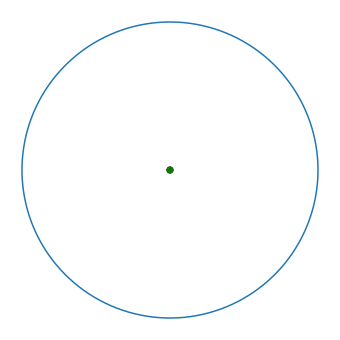

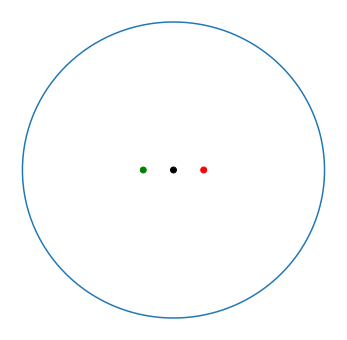

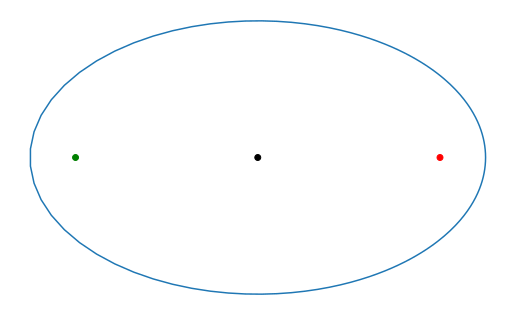

In [4]:
visualize_ellipse(0)
visualize_ellipse(0.2) # Größte Exzentrizität eines Planetens (Merkur) im Sonnensystem
visualize_ellipse(0.8)

# Kleine Exzentrizität

Ellipsen mit kleiner Exzentrizität sind einem Kreis sehr nahe.
Aus dem Bild oben:
\begin{align*}
  b^2 + e^2 &= a^2 \\
  \Rightarrow
  b &= a \sqrt{1-\epsilon^2} \\ &
  = a \left(1 - \frac{\epsilon^2}2 + O(\epsilon^4)\right)
\end{align*}
(Taylor um $\epsilon = 0$).
Der Unterschied zwischen den Halbachsen hängt also nur in *zweiter Ordnung* von der numerischen Exzentrizität ab.
Der Abstand $a\epsilon$ der Brennpunkte vom Mittelpunkt ist hingegen von erster Ordnung.

Für die Planeten des Sonnensystems sind die numerischen Exzentrizitäten relativ klein (den größten Wert hat der Merkur, mit $\epsilon\simeq 0,2$). 
Daher hat Kepler sein erstes Gesetz zunächst (fälschlich) als "die Planeten bewegen sich auf Kreisen, aber die Sonne ist nicht im Mittelpunkt" beschrieben.
Oben sehen Sie eine Ellipse mit $\epsilon=0,2$. 
Ich kann sie visuell nicht von einem Kreis unterscheiden.
Die (grünen) Brennpunkte liegen aber deutlich abseits des Mittelpunkts.

Die geschichtliche Entwicklung ist in [Arnold, Kapitel 2E] kurz erwähnt und wird in [Capderu, Handbook of Satellite Orbits, Kapitel 1.1.5] genauer besprochen.

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def hyp(e,n,rmax,arm):
    def xy(phi):
        r = 1/(1+e*np.cos(phi))
        return(r*np.array([np.cos(phi),np.sin(phi)]))
    
    phi_max = np.arccos( ((1/rmax)-1)/e )
    
    if arm == 'left':
        return(np.array([xy(phi) for phi in np.linspace(-phi_max,phi_max,n)]).transpose())
    elif arm == 'right':
        return(np.array([xy(phi) for phi in np.linspace(np.pi-phi_max,np.pi,n)]).transpose())
    else:
        raise ValueError("arm parameter needs to be 'left' or 'right'")

def visualize_hyp(e):
    plt.gca().set_aspect('equal')
    plt.axis('off') 
    plt.plot(*hyp(e,150,2,'left'))
#    plt.plot(*hyp(e,150,2,'right'))
    plt.plot(0,0,'ro')              # linker Brennpunkt
    plt.plot(-e/(1-e**2),0,'ko')    # Mitte 
    plt.plot(-2*e/(1-e**2),0,'go')  # rechter Brennpunkt
    plt.show()

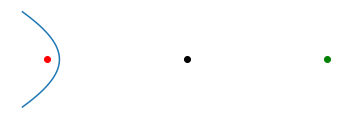

In [67]:
visualize_hyp(1.1)